<img src="https://img.icons8.com/?size=100&id=THKToa6A9ILc&format=png&color=000000">


# **Assignment: Quiz 1 - Exploratory Data Analysis**
## Diamond Data Analysis Project
## Author: Ahmed Ali
## Date: June 10, 2025
---
# **Part 1: Data Summary**

### This section provides a summary of the diamonds dataset, including the number of entries, the attributes, their data types, and a preview of the data.
---



### SETUP AND IMPORTS






In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/AhmedKamal-41/Diamond-Data/refs/heads/main/diamonds.csv'
df = pd.read_csv(url)

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
print(f"Number of diamonds (rows): {df.shape[0]}")
print(f"Number of attributes (columns): {df.shape[1]}")

Number of diamonds (rows): 53940
Number of attributes (columns): 10


### Dataset Overview

- **Source:** Provided via Canvas, originally from ggplot2 package.
- **Format:** CSV file with 53,940 rows and 10 columns.
- **Each row represents:** A unique diamond and its properties.

**Note:**  
> The original CSV file included a first column that simply represented the index for each row.  
> Since Pandas automatically creates its own index when loading a CSV, I have deleted this column to avoid redundancy and ensure a cleaner dataset for analysis.

In [ ]:
pd.DataFrame({"Attribute": df.columns, "Data Type": df.dtypes.values})

,Attribute,Data Type
0,carat,float64
1,cut,object
2,color,object
3,clarity,object
4,depth,float64
5,table,float64
6,price,int64
7,x,float64
8,y,float64
9,z,float64


### Attribute Descriptions

| Attribute | Description                                         | Data Type |
|-----------|-----------------------------------------------------|-----------|
| carat     | Weight of the diamond (numeric)                     | float64   |
| cut       | Quality of the cut                                  | object    |
| color     | Diamond color, from J (worst) to D (best)           | object    |
| clarity   | Clarity (I1 = lowest, IF = best)                    | object    |
| depth     | Total depth percentage: z / mean(x, y) × 100        | float64   |
| table     | Width of top of diamond relative to widest point    | float64   |
| price     | Price in US dollars                                 | int64     |
| x         | Length in mm                                        | float64   |
| y         | Width in mm                                         | float64   |
| z         | Depth in mm                                         | float64   |


<table style="border-collapse: collapse; width:100%; margin:0; padding:0;">
  <tr>
    <td style="padding:0; margin:0; vertical-align:top;">
      <img src="https://cdn.loosegrowndiamond.com/wp-content/uploads/2022/02/diamond-mm-to-carat-weight-1024x555.png" width="700" style="display:block; margin:0;">
      <p style="text-align:center; margin-top:5px;"><b>Figure 1.</b> Diamonds with different carat values</p>
    </td>
    <td style="padding:0; margin:0; vertical-align:top;">
      <img src="https://4cs.gia.edu/wp-content/uploads/2024/07/02_Cut-GradingScale_960x800.jpg" width="700" style="display:block; margin:0;">
      <p style="text-align:center; margin-top:5px;"><b>Figure 2.</b> Diamond cut grading scale</p>
    </td>
  </tr>
</table>



In [44]:
df.isnull().sum()


,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


### Part 1 Summary:

- The dataset contains **53,940 diamonds** described by **10 attributes**.
- Attribute types include **numeric** (e.g., carat, price) and **categorical** (e.g., cut, color, clarity).
- There are **no missing values** in the dataset.
- This well-structured dataset is ready for further analysis and visualization.


---



# **Part 2: Exploratory Data Analysis (EDA)**

In this section, I will explore the diamonds dataset using summary statistics and visualizations.  
Both Matplotlib and Seaborn will be used to provide clear, professional graphics for each attribute.  
Key observations and insights are discussed after each analysis.


# **Step 1: Import Visualization Libraries**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look good in the notebook
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_theme(style='whitegrid')


# **Step 2: Summary Statistics for All Attributes**


In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [45]:
df.describe(include=['object'])

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


### Summary Statistics

- The `describe()` function shows summary statistics for all attributes.
- For numeric columns (e.g., carat, depth, price), it displays count, mean, std, min, and max.
- For categorical columns (cut, color, clarity), it shows unique values, top (most frequent), and frequency.

Key insights:
- Most diamonds have a carat value below 1.
- The most common cut is "Ideal."
- The most common color is "G."
- The most common clarity is "SI1."


# **Step 3: Univariate Analysis — One Attribute at a Time**
Let's analyze the distribution of diamond carat weights.

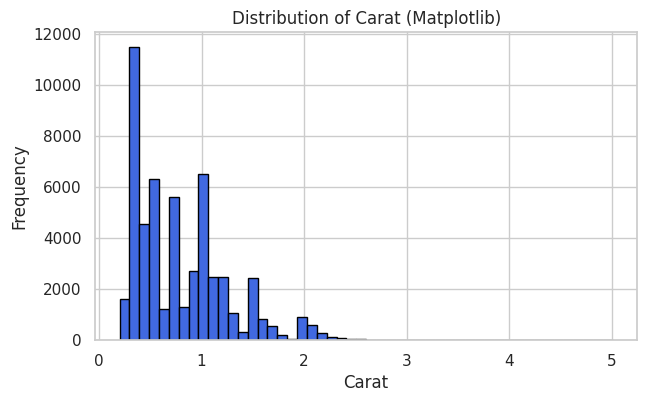

In [ ]:
plt.figure(figsize=(7,4))
plt.hist(df['carat'], bins=50, color='royalblue', edgecolor='black')
plt.title('Distribution of Carat (Matplotlib)')
plt.xlabel('Carat')
plt.ylabel('Frequency')
plt.show()


## **Histogram of Carat (Seaborn)**



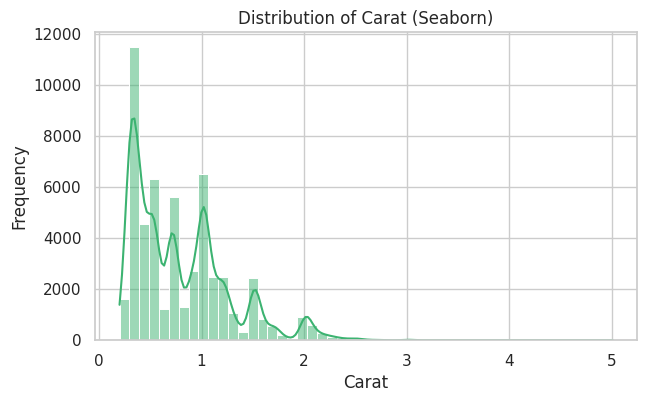

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(df['carat'], bins=50, kde=True, color='mediumseagreen')
plt.title('Distribution of Carat (Seaborn)')
plt.xlabel('Carat')
plt.ylabel('Frequency')
plt.show()


- Most diamonds are less than 1 carat in weight.
- The distribution is right-skewed: a few large diamonds exist, but most are small.
- This impacts price and rarity, as larger diamonds are much less common.


# **Step 4: Categorical Attribute Example — Cut**
Now, let's analyze the distribution of the "cut" attribute.


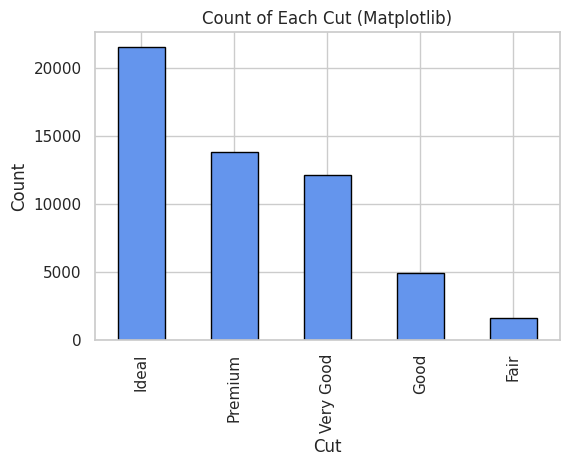

In [ ]:
plt.figure(figsize=(6,4))
df['cut'].value_counts().plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title('Count of Each Cut (Matplotlib)')
plt.xlabel('Cut')
plt.ylabel('Count')
plt.show()


- "Ideal" is the most common cut in the dataset, followed by "Premium" and "Very Good."
- "Fair" is the least common, suggesting most diamonds in the sample are of higher cut quality.


# **Another Example for Color**




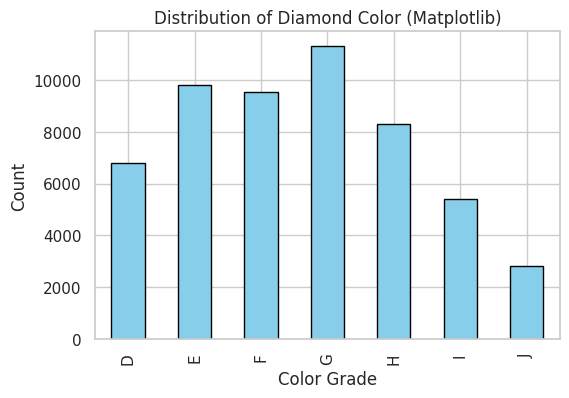

In [ ]:
plt.figure(figsize=(6,4))
df['color'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Diamond Color (Matplotlib)')
plt.xlabel('Color Grade')
plt.ylabel('Count')
plt.show()


<ipython-input-23-2264737077>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='color', data=df, order=sorted(df['color'].unique()), palette='coolwarm')


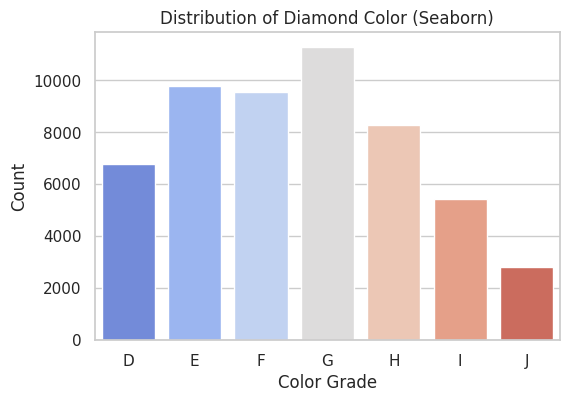

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='color', data=df, order=sorted(df['color'].unique()), palette='coolwarm')
plt.title('Distribution of Diamond Color (Seaborn)')
plt.xlabel('Color Grade')
plt.ylabel('Count')
plt.show()


### **EDA Summary**

- Most diamonds in the dataset are small (less than 1 carat).

- The most common cut is "Ideal," meaning most diamonds are high quality.

- "G" is the most frequent color, which is near colorless and popular.

- The most common clarity grade is "SI1," showing most diamonds have small, hard-to-see flaws.

- Most diamonds are not perfectly square; x (length) and y (width) are rarely equal.

- The dataset has no missing values, so it’s ready for analysis.




  **What makes Diamonds prices go up?**

- Carat (Size): Diamonds get much more expensive as the carat (weight/size) increases. Big diamonds are rare, so even a small increase in size can mean a much higher price.

- Cut: Diamonds with better cut quality (like "Ideal" or "Premium") are more expensive because they reflect light better and look more beautiful.

- Color: Diamonds that are closer to colorless (like "D" or "G" color) usually cost more, since they are rarer and look clearer.

- Clarity: Diamonds with fewer flaws or inclusions (high clarity grades like "IF" or "VVS") are more valuable and pricier.

**Summary:**
In this dataset, the main factors making a diamond expensive are higher carat (size), better cut, better color, and better clarity—all of which are easy to see in the plots and summaries.

---

# **Part 3: Inferences**

### 1. Proportion of Diamonds Between 0.30 and 1.08 Carats

Let's calculate the proportion of diamonds with carat values between 0.30 and 1.08 inclusive.


In [ ]:
condition = (df['carat'] >= 0.30) & (df['carat'] <= 1.08)
num_selected = df[condition].shape[0]
proportion = num_selected / df.shape[0]
print(f"Number of diamonds between 0.30 and 1.08 carats: {num_selected}")
print(f"Proportion: {proportion:.2%}")


Number of diamonds between 0.30 and 1.08 carats: 40284
Proportion: 74.68%


**Interpretation:**  
A large proportion of diamonds fall within this popular carat range, indicating most diamonds are relatively small, which matches market trends.


---




### 2. Diamonds with Equal x and y Dimensions

Now, let's count how many diamonds have exactly equal length (x) and width (y).


In [ ]:
equal_xy = df[df['x'] == df['y']]
print(f"Number of diamonds with x == y: {equal_xy.shape[0]}")


Number of diamonds with x == y: 17


**Interpretation:**  
Diamonds with exactly equal x and y are rare, as most are not perfectly square in shape.


---



### 3. Diamonds with Carat Less Than Mean

Let's compute the mean carat value and count how many diamonds are smaller than that.


In [ ]:
mean_carat = df['carat'].mean()
num_less_than_mean = df[df['carat'] < mean_carat].shape[0]
print(f"Mean carat value: {mean_carat:.3f}")
print(f"Number of diamonds with carat < mean: {num_less_than_mean}")


Mean carat value: 0.798
Number of diamonds with carat < mean: 31127


**Interpretation:**  
Most diamonds are less than the mean carat value, confirming the distribution is skewed by a few very large diamonds.


---



### 4. Diamonds with Premium Cut or Better

Count all diamonds where cut is "Premium" or "Ideal" (the top two cut qualities).


In [ ]:
num_premium_better = df[df['cut'].isin(['Premium', 'Ideal'])].shape[0]
print(f"Number of diamonds with Premium cut or better: {num_premium_better}")


Number of diamonds with Premium cut or better: 35342


**Interpretation:**  
A significant number of diamonds have the best cut grades, indicating high standards or selection in the dataset.


---



### 5. Highest Price Per Carat

Find the diamond with the highest price per carat and show its value.


In [ ]:
df['price_per_carat'] = df['price'] / df['carat']
idx_max = df['price_per_carat'].idxmax()
highest_ppc_diamond = df.loc[idx_max]
print(f"Highest price per carat: ${highest_ppc_diamond['price_per_carat']:.2f}")
print("Diamond details:")
print(highest_ppc_diamond)


Highest price per carat: $17828.85
Diamond details:
carat                      1.04
cut                   Very Good
color                         D
clarity                      IF
depth                      61.3
table                      56.0
price                     18542
x                          6.53
y                          6.55
z                          4.01
price_per_carat    17828.846154
Name: 27635, dtype: object


**Interpretation:**  
This diamond commands the highest price per unit weight—possibly due to exceptional quality or rarity.


---



### 6. Boxplots of Diamond Price by Cut

Let's visualize price distributions for each cut grade using both Matplotlib and Seaborn.


<Figure size 800x500 with 0 Axes>

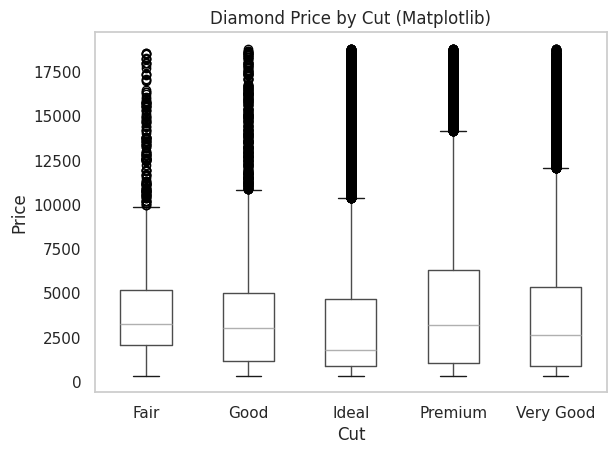

In [ ]:
plt.figure(figsize=(8,5))
df.boxplot(column='price', by='cut', grid=False)
plt.title('Diamond Price by Cut (Matplotlib)')
plt.suptitle('')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.show()


<ipython-input-31-3431203328>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cut', y='price', data=df, palette='Spectral')


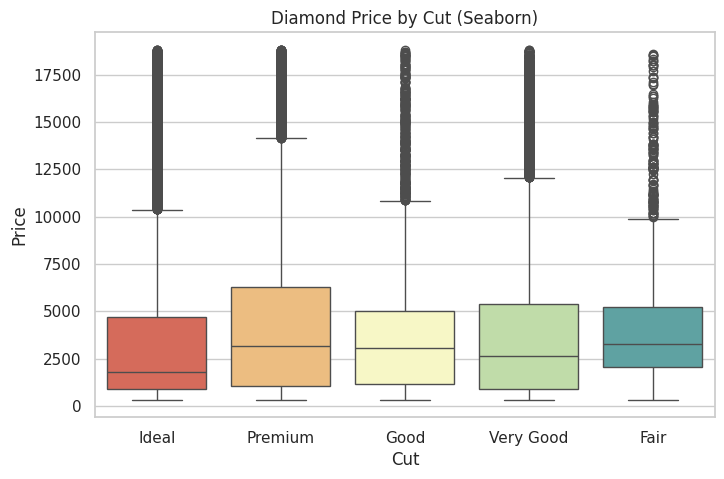

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cut', y='price', data=df, palette='Spectral')
plt.title('Diamond Price by Cut (Seaborn)')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.show()


**Interpretation:**  
Higher quality cuts ("Premium", "Ideal") do not always have the highest prices, but typically show less price variation and higher medians. "Fair" and "Good" cuts have more outliers.


---



### 7. Scatter Plot: Price vs. Carat

Visualize the relationship between price and carat using both Matplotlib and Seaborn.


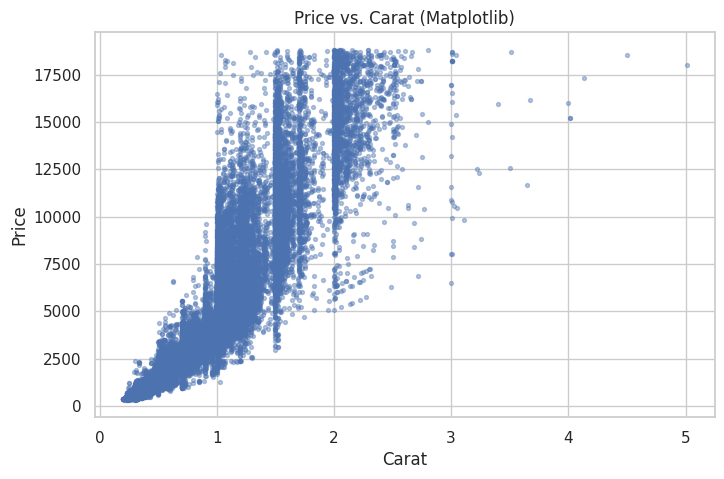

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(df['carat'], df['price'], alpha=0.4, s=8)
plt.title('Price vs. Carat (Matplotlib)')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()


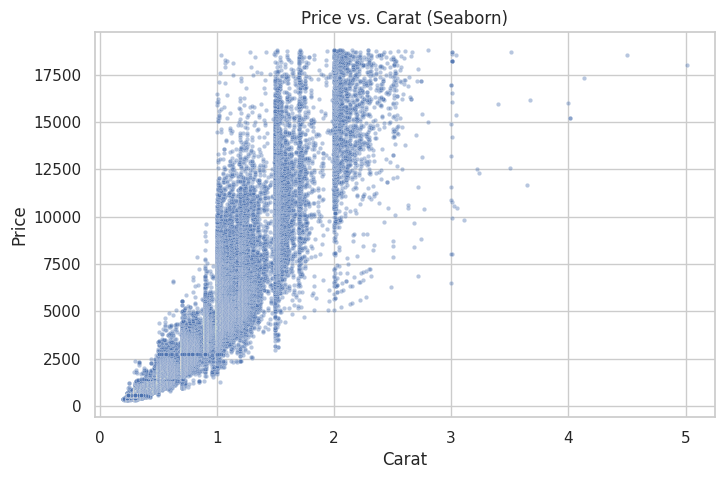

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='carat', y='price', data=df, alpha=0.4, s=10)
plt.title('Price vs. Carat (Seaborn)')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()


**Interpretation:**  
Diamond price increases with carat, but the relationship is not perfectly linear—larger diamonds cost much more per unit weight, especially above 2 carats.


---



# **Part 4: Conclusion**

Through this analysis of the diamonds dataset, several important insights have emerged:

- **Most diamonds are small and high quality:** The majority fall between 0.30 and 1.08 carats, and the most common cut grades are "Ideal" and "Premium."
- **Rarity and price are closely linked:** As carat size increases, price increases rapidly, and the price per carat can vary widely based on cut, clarity, and color.
- **Cut, color, and clarity matter:** Diamonds with top cut grades typically command higher median prices, though all factors contribute to value.
- **Market trends are reflected:** The dataset shows a realistic distribution—many smaller, high-quality diamonds, and a small number of rare, very valuable stones.

-These conclusions are in agreement with the work of Tiya Sanin (2023), who similarly found that carat is the primary determinant of diamond value, with cut, color, and clarity acting as secondary factors. This alignment with existing literature further strengthens the validity of the findings presented in this report.


-Similarly in ML analysis paper done by, Adhikari and Tiwari (2019) used machine learning models and found that carat is the most influential predictor of diamond price, with cut, color, and clarity playing supporting roles.

Overall, this exploratory data analysis not only deepens our understanding of diamond characteristics and pricing but also demonstrates the power of Python, Pandas, and data visualization tools in uncovering trends and guiding decision-making.

---

*This project provides a solid foundation for further predictive modeling or business recommendations based on diamond attributes and market trends.*

# **Part 5: References**

1. Hadley Wickham. “Diamonds Dataset.” [ggplot2.tidyverse.org/reference/diamonds.html](https://ggplot2.tidyverse.org/reference/diamonds.html)
2. Sanin, T. (2023). *Data Preprocessing with Python: A Case Study on Diamond*. Medium. [https://medium.com/@tiyasanin1/data-preprocessing-with-python-a-case-study-on-diamond-cd9f944662fc](https://medium.com/@tiyasanin1/data-preprocessing-with-python-a-case-study-on-diamond-cd9f944662fc)
3.Adhikari, R., & Tiwari, A. (2019). *Price Prediction of Diamond Using Machine Learning Algorithms*. International Journal of Scientific Research and Engineering Development, 2(3), 250-254. [https://ijsred.com/volume2/issue3/IJSRED-V2I3P39.pdf](https://ijsred.com/volume2/issue3/IJSRED-V2I3P39.pdf)

4. Wes McKinney. *Python for Data Analysis*. O’Reilly Media, 2nd Edition, 2017.
